# Regresyon Analiz Sonuçlarının İncelenmesi

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Assignment3/Dataset/Hitters.csv');
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Veri Setinin ANalizinin Yapılması

Veri setinin öncelikle sütunların veri tipi ve not null eleman sayıları incelenmiştir.

In [ ]:
dataset.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


Veri setinde Salary sütununda null veriler olduğu görülmüştür. Sütunlara göre toplam kaç adet null olduğu gösterilmiştir.

In [ ]:
dataset.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Null satırlar düşürülmüştür.

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

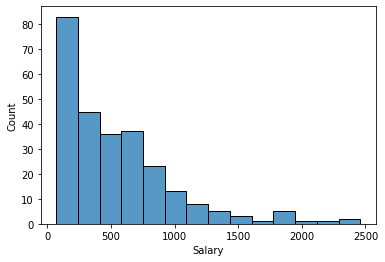

In [ ]:
sns.histplot(dataset['Salary']);

## Korelasyonların Gösterilmesi

In [ ]:
dataset.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


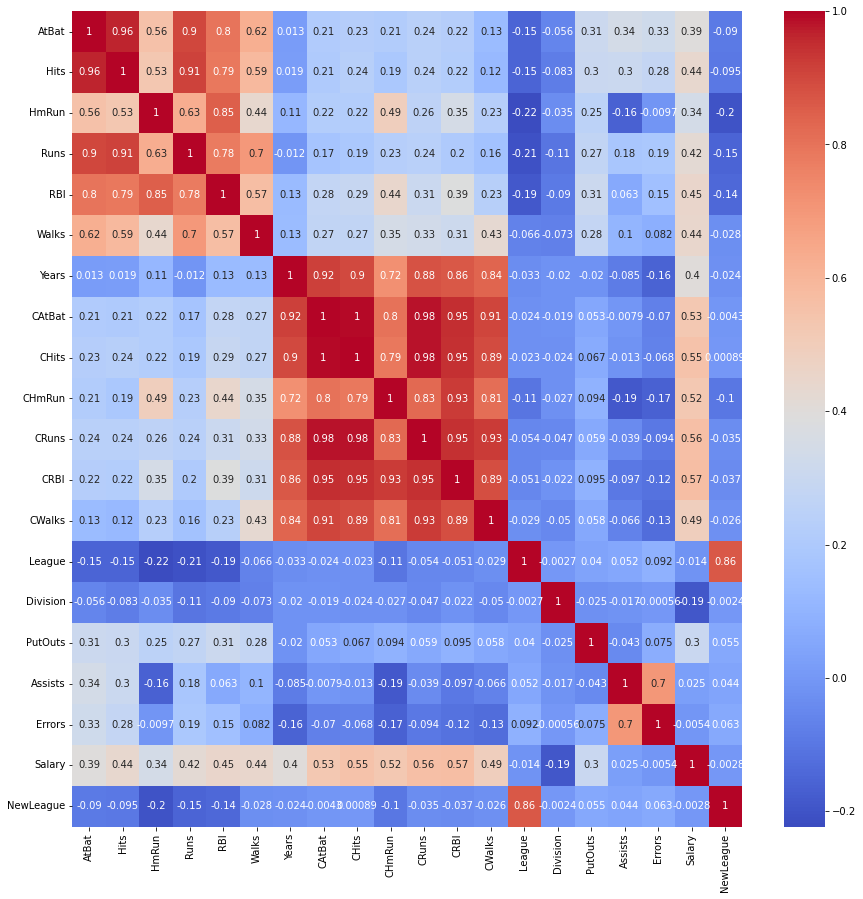

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm");

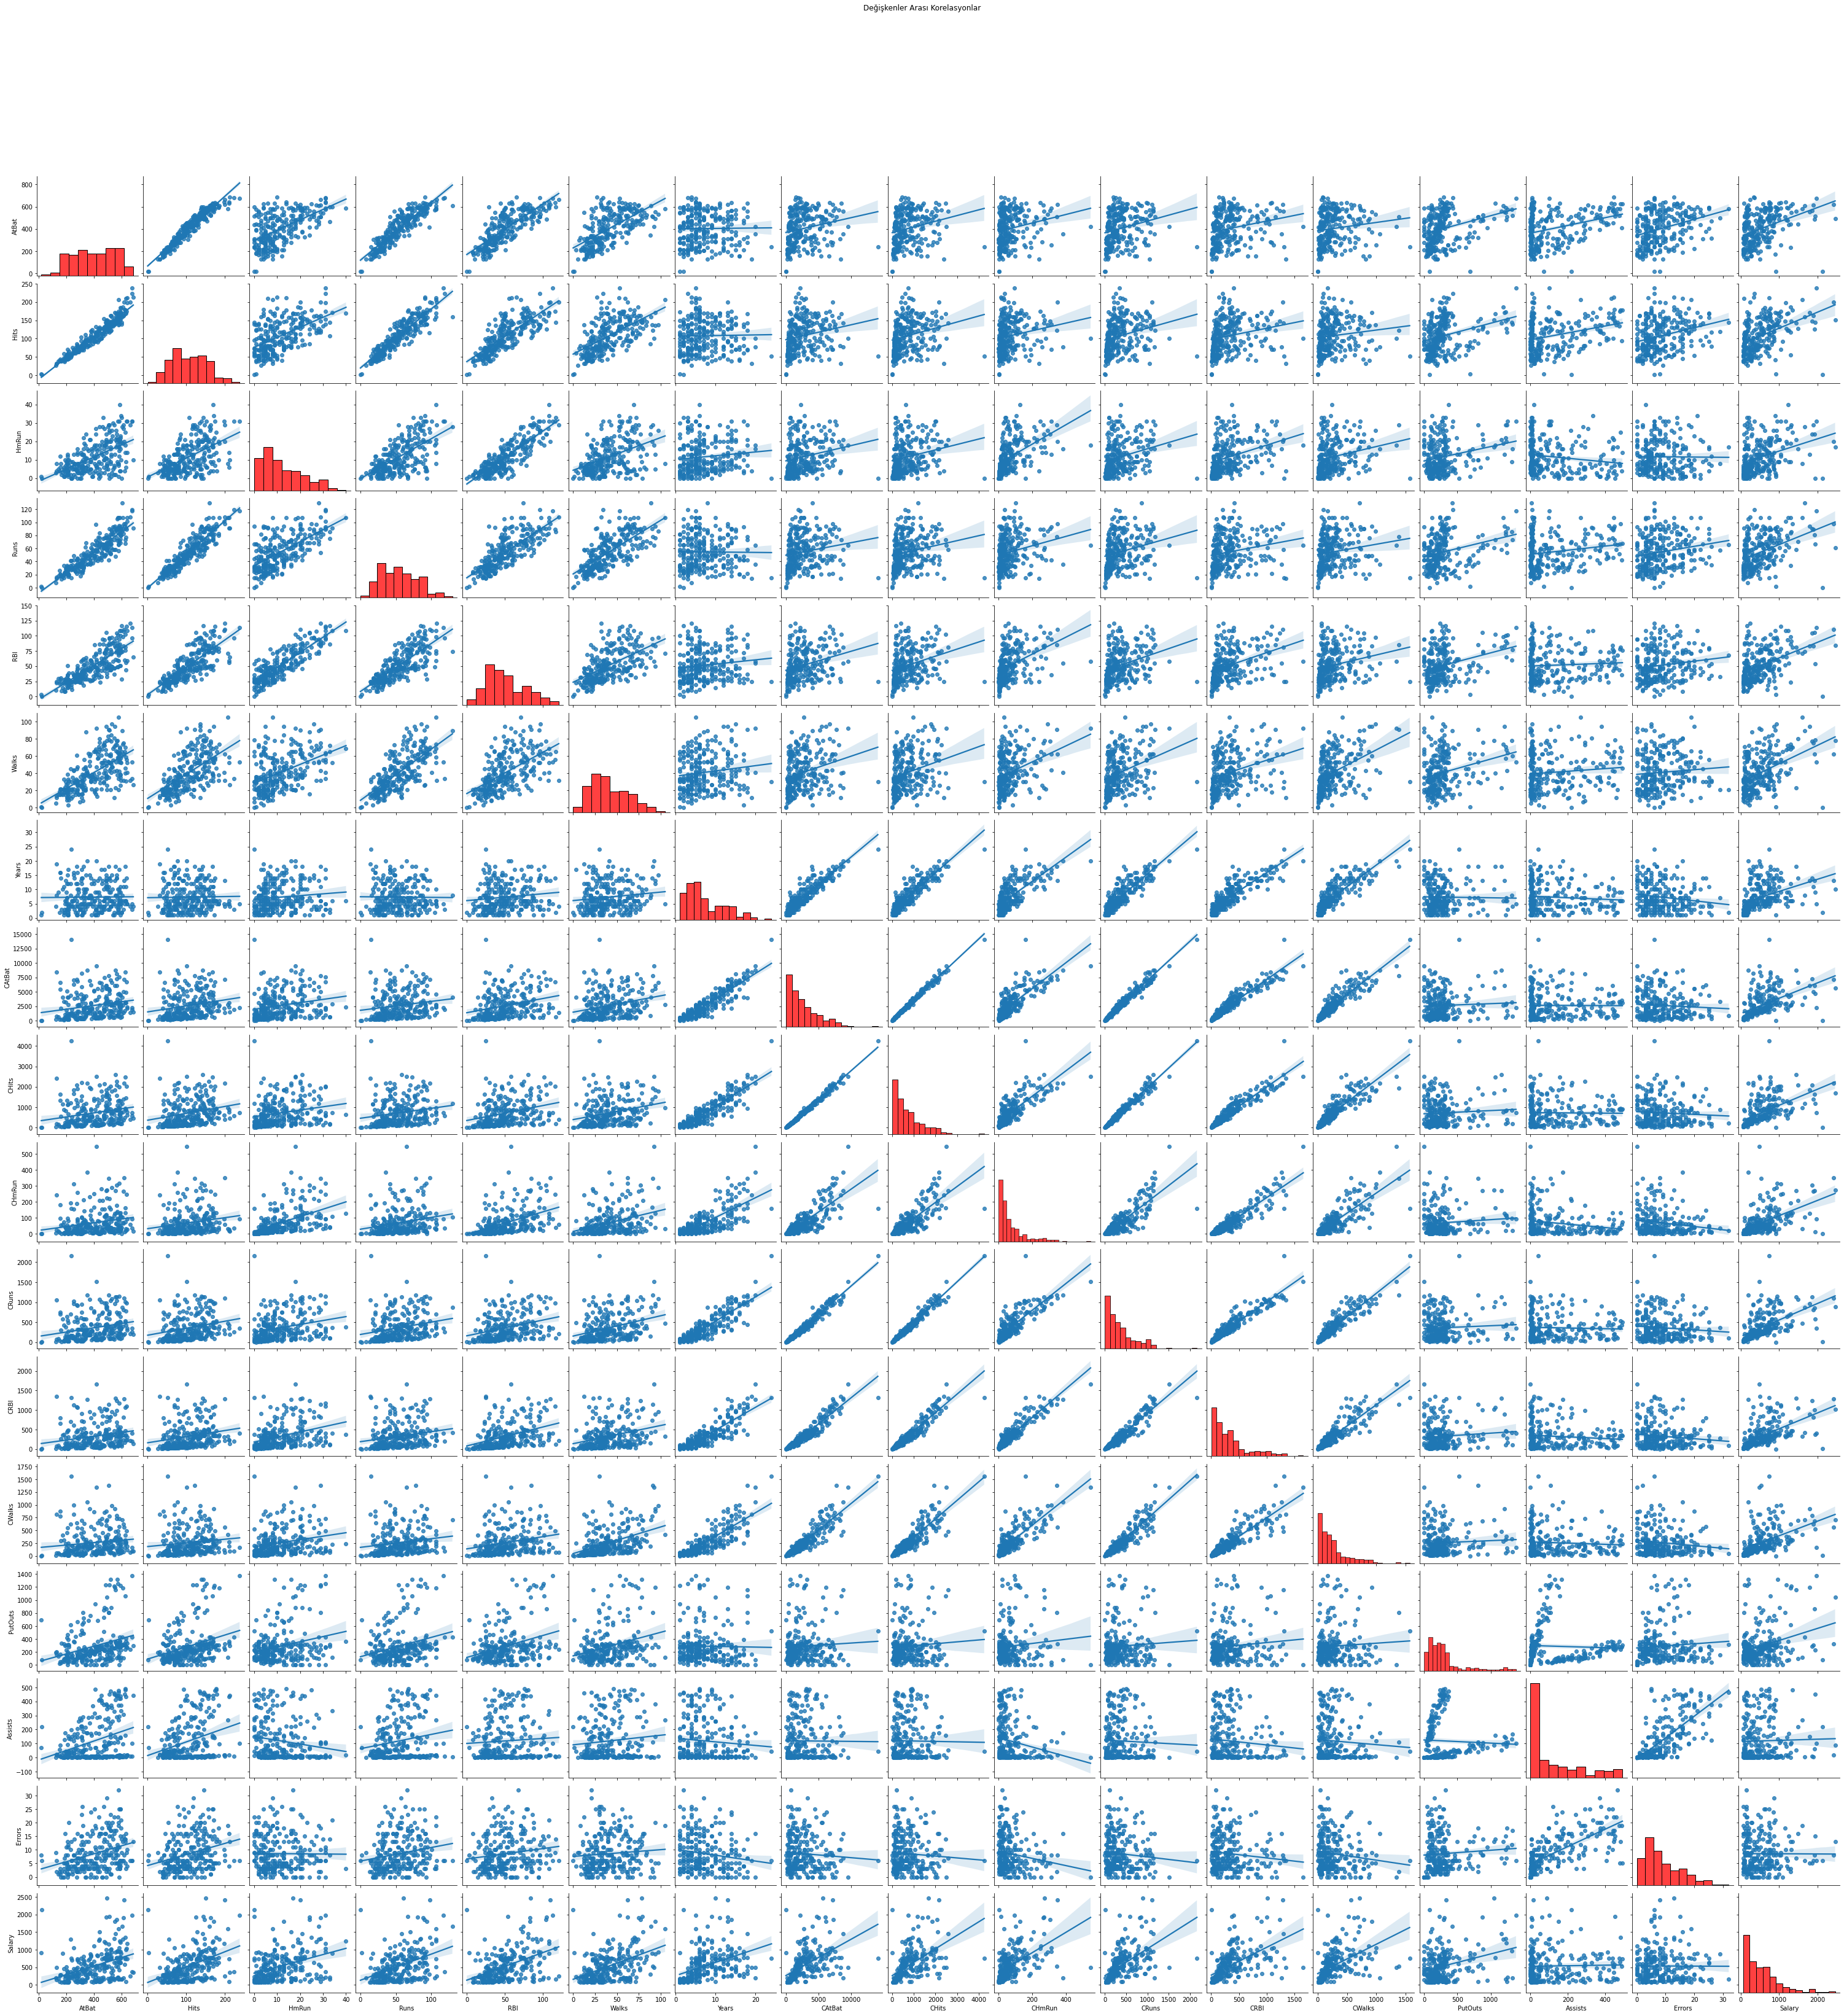

In [ ]:
g= sns.pairplot(dataset ,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Değişkenler Arası Korelasyonlar", y=1.08)

plt.show()

## Kategorik değişkenlerin içeriklerinin incelenmesi

In [ ]:
def cat_info(column):
  print(dataset[column].unique())
  print(dataset[column].value_counts())
  dataset[column].value_counts().plot.barh()

['N' 'A']
A    139
N    124
Name: League, dtype: int64


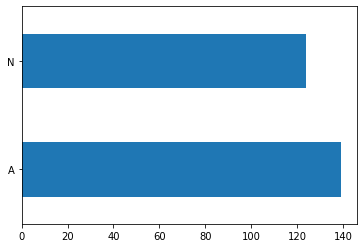

In [ ]:
cat_info('League')

['W' 'E']
W    134
E    129
Name: Division, dtype: int64


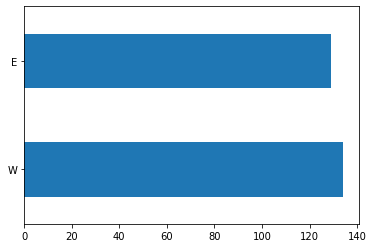

In [ ]:
cat_info('Division')

['N' 'A']
A    141
N    122
Name: NewLeague, dtype: int64


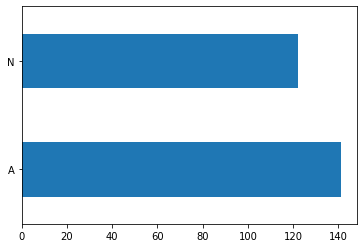

In [ ]:
cat_info('NewLeague')

Kategorik değişkenlerin one hot coding ile dönüştürlmesi

In [ ]:
lbe = LabelEncoder()
dataset["League"] = lbe.fit_transform(dataset["League"])
dataset["Division"] = lbe.fit_transform(dataset["Division"])
dataset["NewLeague"] = lbe.fit_transform(dataset["NewLeague"])
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


Bağımlı değişken ayrılmıştır.

In [ ]:
y = dataset['Salary']
X = dataset.drop(['Salary'], axis=1)
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

X değerinin satır ve sütun sayısı gösterilmiştir.

In [ ]:
X.shape

(263, 19)

y değerinin satır ve sütunu gösterilmiştir.

In [ ]:
y.shape

(263,)

Veri setini modeli oluşturmak için train ve test olmak üzere iki parçaya ayrılmıştır. Train %70, test ise %30'dur

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (184, 19)
X_test Shape:  (79, 19)
y_train Shape:  (184,)
y_test Shape:  (79,)


Scale yaparak veri setinin değerlerinin 0 ile 1 arasında olması sağlanmıştır.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regresyon Modelinin Oluşturulması

Lineer Regresyon, doğrusal bir fonksiyonu kullanarak veriler arasındaki ilişkiyi modellemeye çalışır. Bu doğrusal fonksiyon, veri setindeki bağımsız değişkenlerin ağırlıklı toplamını hesaplar ve bir sabit (bias) ekler. Bu fonksiyon, en uygun ağırlıkların bulunması için eğitilir ve sonunda bir model oluşturur.

In [ ]:
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Slope Değerlerinin Gösterimi

In [ ]:
print(model.coef_)

[-191.34387973  297.15582487   84.95377461  -36.14220174  -74.94210188
   81.89262688   96.49961722 -911.76116565  457.49588505   37.71944466
  526.03523498  169.52771267 -163.85212562   71.12545294  -44.18282021
   87.83844572   53.11726227  -13.81711304  -30.7645125 ]


Intercept değerinin gösterimi

In [ ]:
print(model.intercept_)

535.83825


Train için hata değerlerinin gösterilmiştir.

In [ ]:
print(r2_score(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))

0.6032598946938192
204.7971156669445
73601.99341533116
159.08725040319626


In [ ]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(median_absolute_error(y_test, y_test_pred))

0.38062339666128975
247.7349462205361
150406.5837312907
172.11368212015515


Karşılaştırmalı tablo için bulunan hata değerleri dataframe de bir araya getirilmiştir.

In [ ]:
def get_row_of_compare(name, y_train, y_train_pred, y_test, y_test_pred):
  row = np.array([
      name,
      r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), 
      mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred), 
      mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), 
      median_absolute_error(y_train, y_train_pred), median_absolute_error(y_test, y_test_pred)
  ])
  return row

In [ ]:
row = get_row_of_compare('Linear', y_train, y_train_pred, y_test, y_test_pred)
compare = pd.DataFrame(data=[row], columns=['', 'R2 Eğitim', 'R2 Test', 'Mean AE Eğitim', 'Mean AE Test', 'MSE Eğitim', 'MSE Test', 'Median AE Eğitim', 'Median AE Test'])
compare.head()

,,R2 Eğitim,R2 Test,Mean AE Eğitim,Mean AE Test,MSE Eğitim,MSE Test,Median AE Eğitim,Median AE Test
0,Linear,0.6032598946938192,0.38062339666128975,204.7971156669445,247.7349462205361,73601.99341533116,150406.5837312907,159.08725040319626,172.11368212015515


## Random Forest Modelinin Oluşturulması

Random forest regresyon birden fazla karar ağacını kullanarak daha uyumlu modeller üreterek isabetli tahminlerde bulunmaya yarayan bir regresyon modelidir. 

RFR, her bir ağacı bağımsız olarak eğitir ve her ağaç için rastgele seçilen bir alt küme oluşturur. Ağaçlar arasındaki farklılık, bu rastgele alt kümelerin farklı olması nedeniyle oluşur. Ağaçlar, veri setindeki her bir özellik için bir eşik değeri belirler ve veri setindeki her bir örneği bir ağaçta ilgili dallarda sınıflandırır.

RFR, ağaçların sonuçlarını birleştirerek final tahminleri yapar. Bu birleştirme işlemi, tüm ağaçların tahminlerinin ortalamasını alarak veya en yaygın tahmin değerini seçerek gerçekleştirilebilir

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
model = regressor.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Eğitim seti için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))

0.9468630349287653
59.877856521739155
9857.804897907734
31.260005000000035


Test için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(median_absolute_error(y_test, y_test_pred))

0.5045660294121692
205.23916810126582
120308.92122638757
109.03330999999991


Değerler karşılaştırma dataframe ine eklenip liner ile karşılaştırılması yapılmıştır.

In [ ]:
row = get_row_of_compare('Random Forest', y_train, y_train_pred, y_test, y_test_pred)
compare.loc[1] = row
compare.head()

,,R2 Eğitim,R2 Test,Mean AE Eğitim,Mean AE Test,MSE Eğitim,MSE Test,Median AE Eğitim,Median AE Test
0,Linear,0.6032598946938192,0.38062339666128975,204.7971156669445,247.7349462205361,73601.99341533116,150406.5837312907,159.08725040319626,172.11368212015515
1,Random Forest,0.9468630349287653,0.5045660294121692,59.877856521739155,205.23916810126582,9857.804897907734,120308.92122638757,31.260005000000035,109.03330999999991


# Destek Vektör Regresyonu

SVR, bir veri seti içindeki özelliklerin ve hedef değişkenin doğrusal veya doğrusal olmayan bir fonksiyonu oluşturmak için kullanılır. Doğrusal regresyon modellerinden farklı olarak, SVR, doğrusal olmayan modeller oluşturabilir ve bu sayede daha karmaşık veri yapılarına uygulanabilir.

In [ ]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
model = svr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Eğitim seti için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))

0.4751396834354501
214.17152841551078
97370.45750375971
146.53445400468135


Test için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(median_absolute_error(y_test, y_test_pred))

0.3247453539119888
248.09615162259973
163975.75226334351
154.97602043444996


Değerler karşılaştırma dataframe ine eklenip liner ile karşılaştırılması yapılmıştır.

In [ ]:
row = get_row_of_compare('SVR', y_train, y_train_pred, y_test, y_test_pred)
compare.loc[2] = row
compare.head()

,,R2 Eğitim,R2 Test,Mean AE Eğitim,Mean AE Test,MSE Eğitim,MSE Test,Median AE Eğitim,Median AE Test
0,Linear,0.6032598946938192,0.38062339666128975,204.7971156669445,247.7349462205361,73601.99341533116,150406.5837312907,159.08725040319626,172.11368212015515
1,Random Forest,0.9468630349287653,0.5045660294121692,59.877856521739155,205.23916810126582,9857.804897907734,120308.92122638757,31.260005000000035,109.03330999999991
2,SVR,0.4751396834354501,0.3247453539119888,214.17152841551078,248.09615162259973,97370.45750375971,163975.75226334351,146.53445400468135,154.97602043444996


# Ridge Regresyonu

Ridge Regresyon, lineer regresyonun bir türüdür ve aşırı uyum (overfitting) sorununu önlemek için geliştirilmiştir. Bu sorunu önlemek için Ridge Regresyon, L2 düzenlileştirme yöntemini kullanır.

Bu yöntem, regresyon katsayılarının kareleri ile çarparak ceza uygular ve böylece katsayıların büyüklüğünü sınırlar. Bu ceza terimi, modelin eğitilmesi sırasında toplam hata miktarı fonksiyonuna eklenir. Ridge Regresyonun amacı, ceza terimini kontrol ederek hem eğitim verilerine uyum sağlamayı hem de modelin aşırı uyuma neden olacak kadar karmaşık olmasını önlemektir.

In [ ]:
ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Eğitim seti için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))

0.5941482924660505
202.41421432264232
75292.3495910795
144.13301426034417


Test için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(median_absolute_error(y_test, y_test_pred))

0.40375114163943604
240.3611617390371
144790.34783729582
148.12283042939396


Değerler karşılaştırma dataframe ine eklenip liner ile karşılaştırılması yapılmıştır.

In [ ]:
row = get_row_of_compare('Ridge', y_train, y_train_pred, y_test, y_test_pred)
compare.loc[3] = row
compare.head()

,,R2 Eğitim,R2 Test,Mean AE Eğitim,Mean AE Test,MSE Eğitim,MSE Test,Median AE Eğitim,Median AE Test
0,Linear,0.6032598946938192,0.38062339666128975,204.7971156669445,247.7349462205361,73601.99341533116,150406.5837312907,159.08725040319626,172.11368212015515
1,Random Forest,0.9468630349287653,0.5045660294121692,59.877856521739155,205.23916810126582,9857.804897907734,120308.92122638757,31.260005000000035,109.03330999999991
2,SVR,0.4751396834354501,0.3247453539119888,214.17152841551078,248.09615162259973,97370.45750375971,163975.75226334351,146.53445400468135,154.97602043444996
3,Ridge,0.5941482924660505,0.40375114163943604,202.41421432264232,240.3611617390371,75292.3495910795,144790.34783729582,144.13301426034417,148.12283042939396


# Lasso Regresyonu

Lasso Regresyon, lineer regresyonun bir türüdür ve aşırı uyum (overfitting) sorununu önlemek için geliştirilmiştir. Bu sorunu önlemek için Ridge Regresyon, L1 düzenlileştirme yöntemini kullanır.

Ürettiği modelin tahmin doğruluğunu ve yorumlanabilirliğini arttırmak için hem değişken seçimi hem de regularization yapar. Aynı ridge regresyonda olduğu gibi amaç hata kareler toplamını minimize eden katsayıları, katsayılara ceza uygularayarak bulmaktır. Fakat ridge regresyondan farklı olarak ilgisiz değişkenlerin katsayılarını sıfıra eşitler.

In [ ]:
lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+04, tolerance: 3.414e+03
  model = cd_fast.enet_coordinate_descent(


Eğitim seti için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_train, y_train_pred))
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))
print(median_absolute_error(y_train, y_train_pred))

0.597718696482187
202.78856538817948
74629.97931549835
146.9201215730634


Test için r2 skoru ve hata değerleri gösterilmiştir.

In [ ]:
print(r2_score(y_test, y_test_pred))
print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(median_absolute_error(y_test, y_test_pred))

0.40299417969049556
241.24993714246293
144974.16501757194
140.3509480875275


Değerler karşılaştırma dataframe ine eklenip liner ile karşılaştırılması yapılmıştır.

In [ ]:
row = get_row_of_compare('Lasso', y_train, y_train_pred, y_test, y_test_pred)
compare.loc[4] = row
compare.head()

,,R2 Eğitim,R2 Test,Mean AE Eğitim,Mean AE Test,MSE Eğitim,MSE Test,Median AE Eğitim,Median AE Test
0,Linear,0.6032598946938192,0.38062339666128975,204.7971156669445,247.7349462205361,73601.99341533116,150406.5837312907,159.08725040319626,172.11368212015515
1,Random Forest,0.9468630349287653,0.5045660294121692,59.877856521739155,205.23916810126582,9857.804897907734,120308.92122638757,31.260005000000035,109.03330999999991
2,SVR,0.4751396834354501,0.3247453539119888,214.17152841551078,248.09615162259973,97370.45750375971,163975.75226334351,146.53445400468135,154.97602043444996
3,Ridge,0.5941482924660505,0.40375114163943604,202.41421432264232,240.3611617390371,75292.3495910795,144790.34783729582,144.13301426034417,148.12283042939396
4,Lasso,0.597718696482187,0.40299417969049556,202.78856538817948,241.24993714246293,74629.97931549835,144974.16501757194,146.9201215730634,140.3509480875275
